<a href="https://colab.research.google.com/github/DeepakKoteeswaran/6220/blob/main/6220_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**



**Install Pycaret**

In [ ]:
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


In [ ]:

# Read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/DeepakKoteeswaran/PortfolioProject/main/cwurData.csv')
df.head(n=100)
df=df.loc[df['year'].isin([2014,2015])]
df['year'] = df['year'].replace([2014], 0)
df['year'] = df['year'].replace([2015], 1)
df.rename(columns = {'year':'class'}, inplace = True)
df=df.drop(['country','score','national_rank','alumni_employment','broad_impact','patents'], axis=1)

df = df.rename(columns={'world_rank': 'WR', 'quality_of_education': 'QE', 'quality_of_faculty': 'QF', 'influence':'IF','citations':'CT', 'publications':'PB'})
df

WR                            institution   QE   QF   PB   IF   CT  \
200      1                     Harvard University    1    1    1    1    1   
201      2                    Stanford University   11    4    5    3    3   
202      3  Massachusetts Institute of Technology    3    2   15    2    2   
203      4                University of Cambridge    2    5   10    9   12   
204      5                   University of Oxford    7   10   11   12   11   
...    ...                                    ...  ...  ...  ...  ...  ...   
2195   996              University of the Algarve  367  218  926  845  812   
2196   997                  Alexandria University  236  218  997  908  645   
2197   998            Federal University of Ceará  367  218  830  823  812   
2198   999                 University of A Coruña  367  218  886  974  812   
2199  1000        China Pharmaceutical University  367  218  861  991  812   

      class  
200       0  
201       0  
202       0  
203       0  
204       0  
...     ...  
2195      1  
2196      1  
2197      1  
2198      1  
2199      1  

[2000 rows x 8 columns]

In [ ]:
len(df.index)

2000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 200 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   WR           2000 non-null   int64 
 1   institution  2000 non-null   object
 2   QE           2000 non-null   int64 
 3   QF           2000 non-null   int64 
 4   PB           2000 non-null   int64 
 5   IF           2000 non-null   int64 
 6   CT           2000 non-null   int64 
 7   class        2000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 140.6+ KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

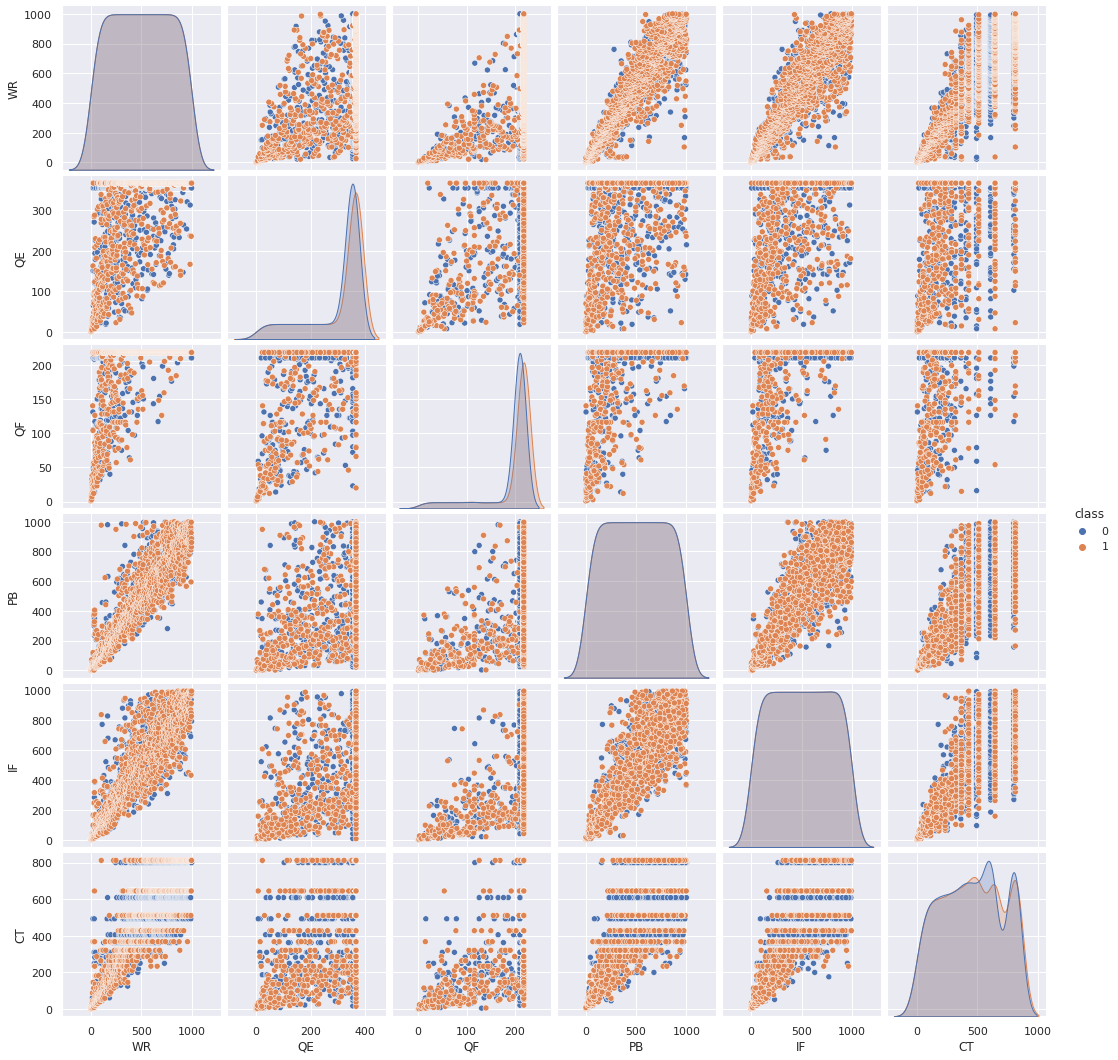

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

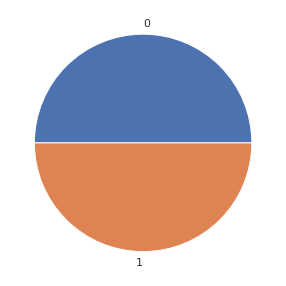

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class','institution'])
X.head(10)

WR  QE  QF  PB  IF  CT
200   1   1   1   1   1   1
201   2  11   4   5   3   3
202   3   3   2  15   2   2
203   4   2   5  10   9  12
204   5   7  10  11  12  11
205   6  13   9  14  13   9
206   7   4   6   7   4   3
207   8  10   8  17  19  10
208   9   5   3  70  25  19
209  10   9  11  18   7  32

In [ ]:
X.describe().transpose()

count      mean         std  min     25%    50%     75%     max
WR  2000.0  500.5000  288.747186  1.0  250.75  500.5  750.25  1000.0
QE  2000.0  296.0015  106.868798  1.0  250.75  355.0  367.00   367.0
QF  2000.0  191.1275   52.402579  1.0  210.00  210.0  218.00   218.0
PB  2000.0  500.4150  288.674823  1.0  250.75  500.5  750.00  1000.0
IF  2000.0  500.2190  288.305050  1.0  250.75  500.5  750.25   991.0
CT  2000.0  449.3415  250.141228  1.0  234.00  428.0  645.00   812.0

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

WR        QE        QF        PB        IF        CT
0 -1.730320 -2.761099 -3.629116 -1.730459 -1.731998 -1.792802
1 -1.726856 -2.667502 -3.571853 -1.716599 -1.725059 -1.784804
2 -1.723391 -2.742379 -3.610028 -1.681949 -1.728529 -1.788803
3 -1.719927 -2.751739 -3.552765 -1.699274 -1.704243 -1.748816
4 -1.716463 -2.704941 -3.457326 -1.695809 -1.693835 -1.752814
5 -1.712999 -2.648783 -3.476414 -1.685414 -1.690365 -1.760812
6 -1.709535 -2.733020 -3.533677 -1.709669 -1.721590 -1.784804
7 -1.706071 -2.676862 -3.495502 -1.675019 -1.669549 -1.756813
8 -1.702607 -2.723660 -3.590941 -1.491376 -1.648732 -1.720824
9 -1.699143 -2.686222 -3.438238 -1.671554 -1.711182 -1.668841

In [ ]:
X.describe().transpose()

count          mean      std       min       25%       50%       75%  \
WR  2000.0  0.000000e+00  1.00025 -1.730320 -0.865160  0.000000  0.865160   
QE  2000.0 -2.557954e-16  1.00025 -2.761099 -0.423536  0.552203  0.664518   
QF  2000.0  1.278977e-16  1.00025 -3.629116  0.360235  0.360235  0.512937   
PB  2000.0 -1.136868e-16  1.00025 -1.730459 -0.865082  0.000295  0.864805   
IF  2000.0  5.684342e-17  1.00025 -1.731998 -0.865512  0.000975  0.867461   
CT  2000.0  2.842171e-17  1.00025 -1.792802 -0.861095 -0.085339  0.782388   

         max  
WR  1.730320  
QE  0.664518  
QF  0.512937  
PB  1.731048  
IF  1.702723  
CT  1.450178

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

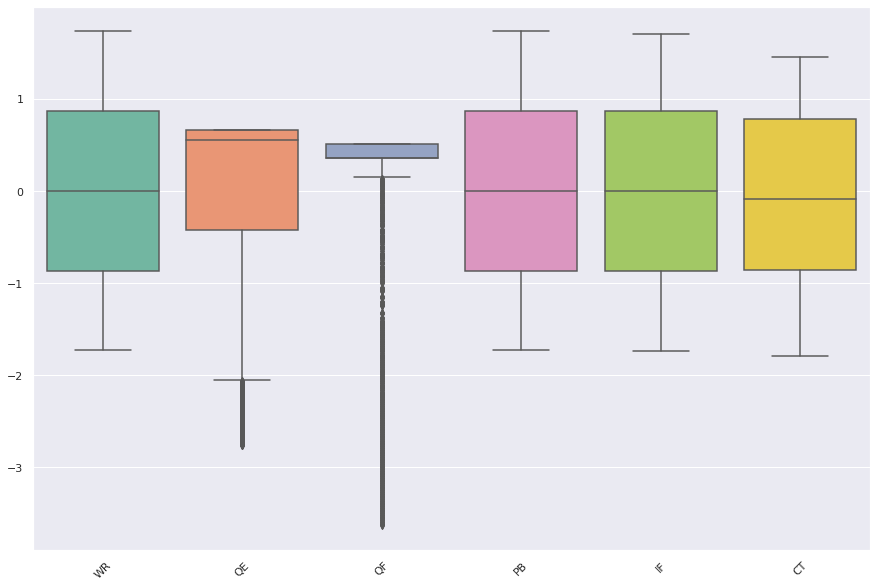

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

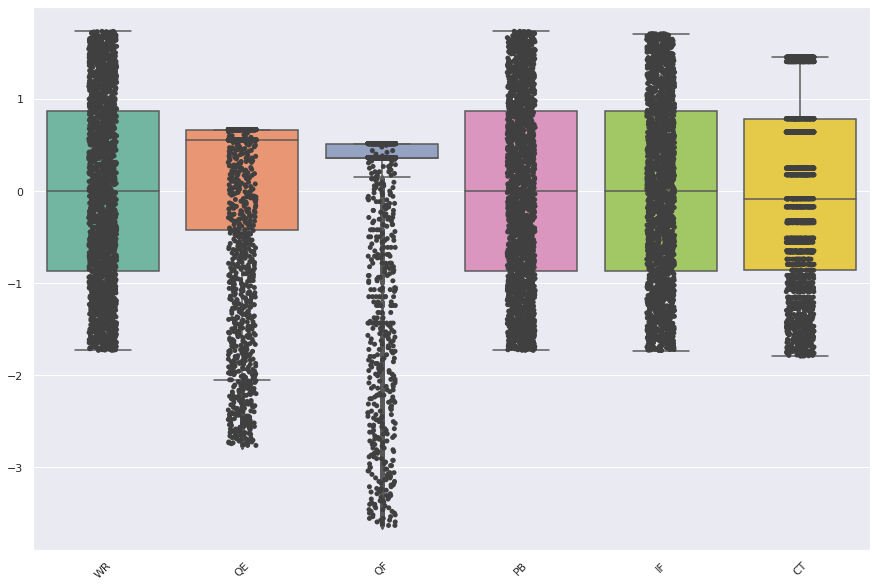

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

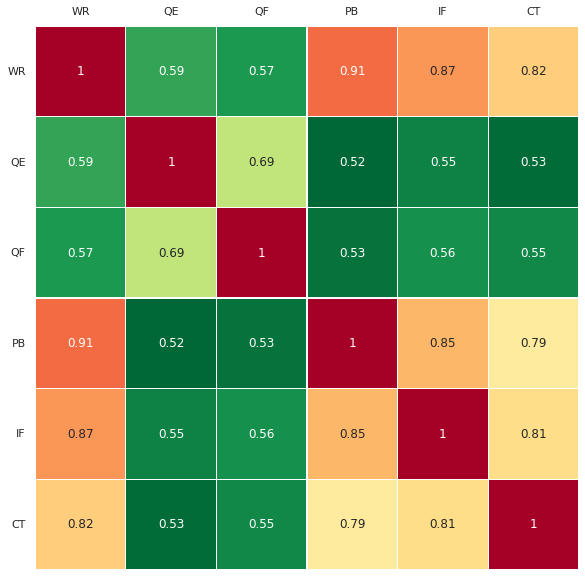

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

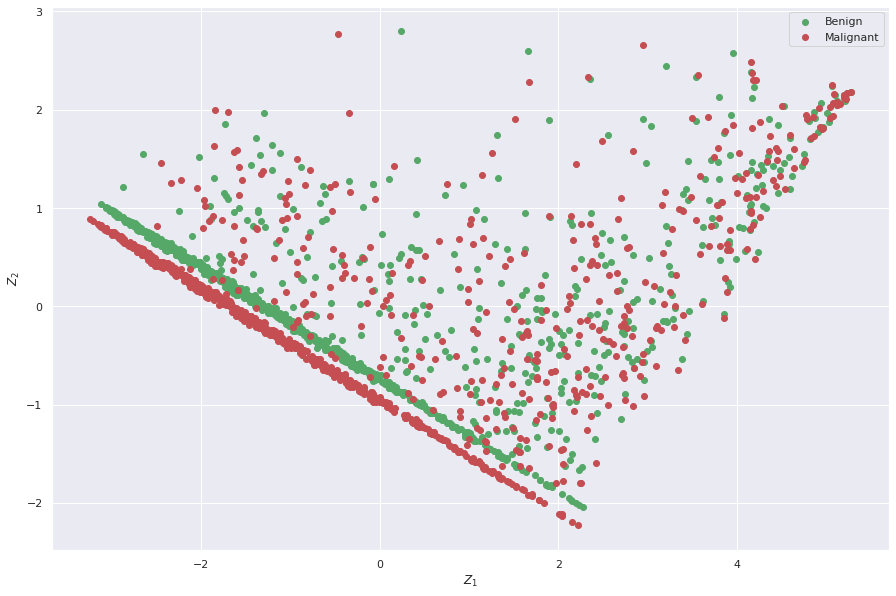

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-0.44631659,  0.22800098,  0.11355184, -0.23178563, -0.20549333,
        -0.79998184],
       [-0.34891072, -0.62289861,  0.6872288 ,  0.10510292,  0.00426476,
         0.08312878],
       [-0.35298242, -0.60251904, -0.70065058, -0.14032712, -0.03395805,
        -0.0248621 ],
       [-0.43231216,  0.29778436,  0.04965102, -0.43100076, -0.45392929,
         0.57458854],
       [-0.43543802,  0.2385242 , -0.00664461, -0.12386531,  0.8496034 ,
         0.12762142],
       [-0.42186034,  0.22674734, -0.14629403,  0.84524128, -0.16947983,
         0.07785442]])

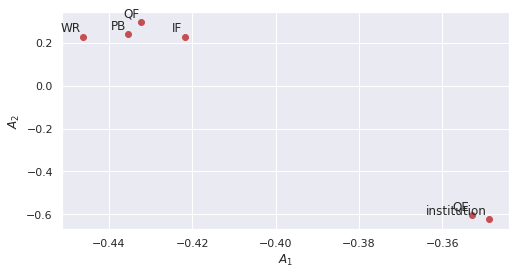

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


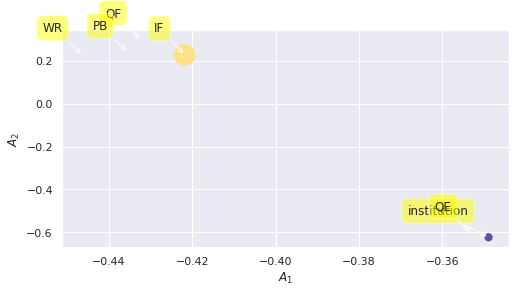

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([4.42338467, 0.80236934, 0.31253349, 0.22450737, 0.15417767,
       0.08602897])

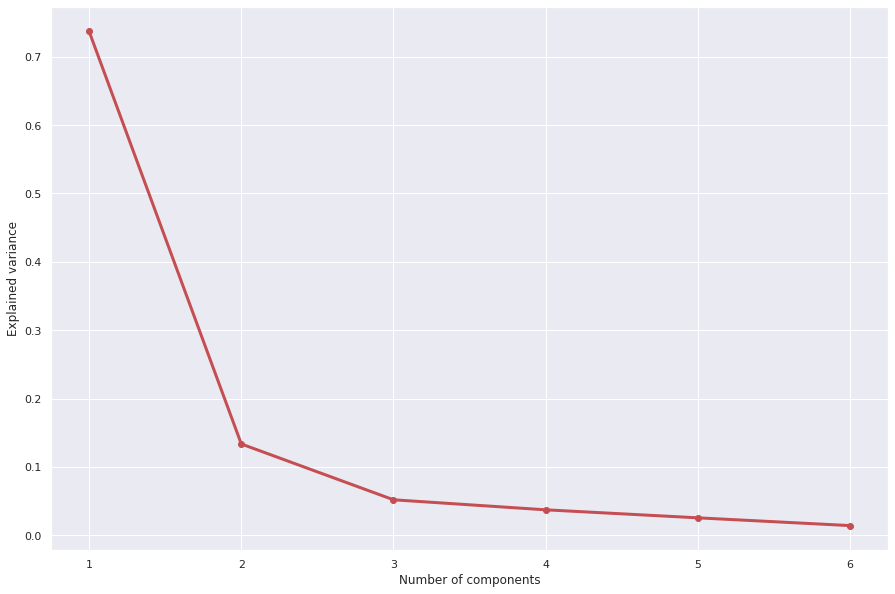

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

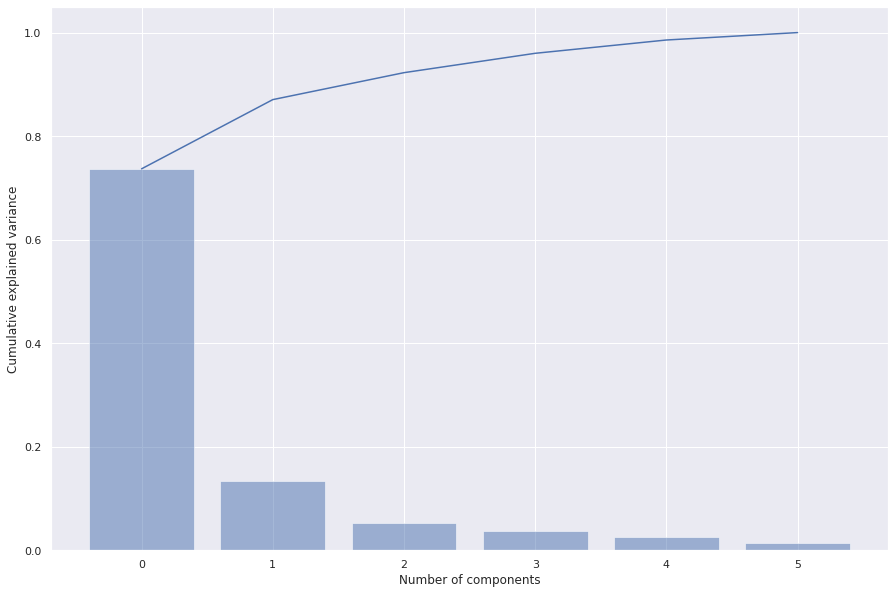

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([2.17704138, 2.09262378, 2.17163972, ..., 0.60596172, 0.78949163,
       0.77855426])

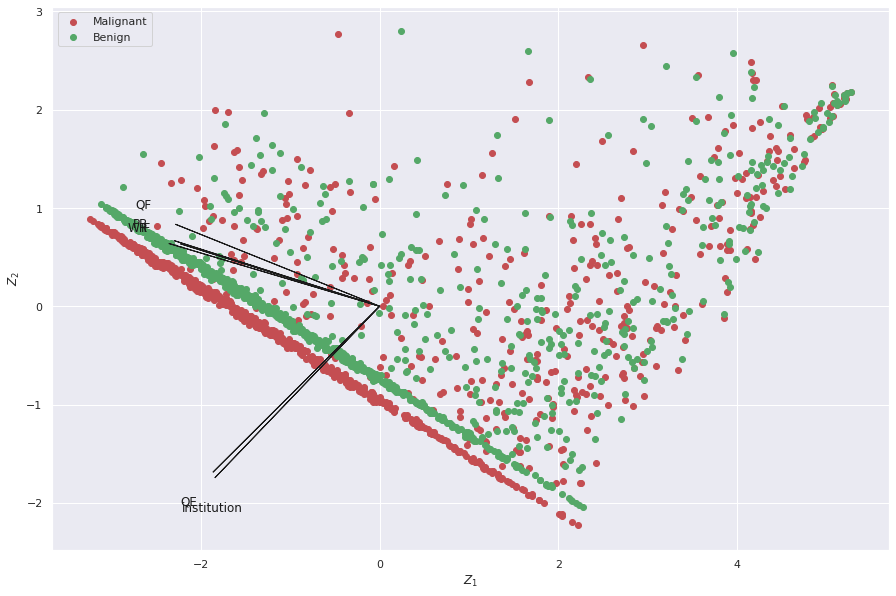

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=d5e806d4bc70b3ff52ca227e6408c4c5bfe9027b014b2a5dc013d2bcf00c92fc
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=0969baee3d353aacd8f8b0901f450f5d2fd288c17b9adea10839093ab1528451
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4
0     5.275250  2.177041  0.636621  0.065141
1     5.208447  2.092624  0.660686  0.066066
2     5.234720  2.171640  0.638698  0.044866
3     5.196272  2.153458  0.585666  0.073302
4     5.140366  2.070201  0.552039  0.057862
...        ...       ...       ...       ...
1995 -2.949144  0.721642  0.145311  0.042025
1996 -2.442704  1.460148 -0.588457 -0.785194
1997 -2.775198  0.605962  0.130089  0.193240
1998 -3.088747  0.789492  0.136635  0.043916
1999 -3.078527  0.778554  0.132336  0.073143

[2000 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [2000] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2000] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f455ae863a0>)

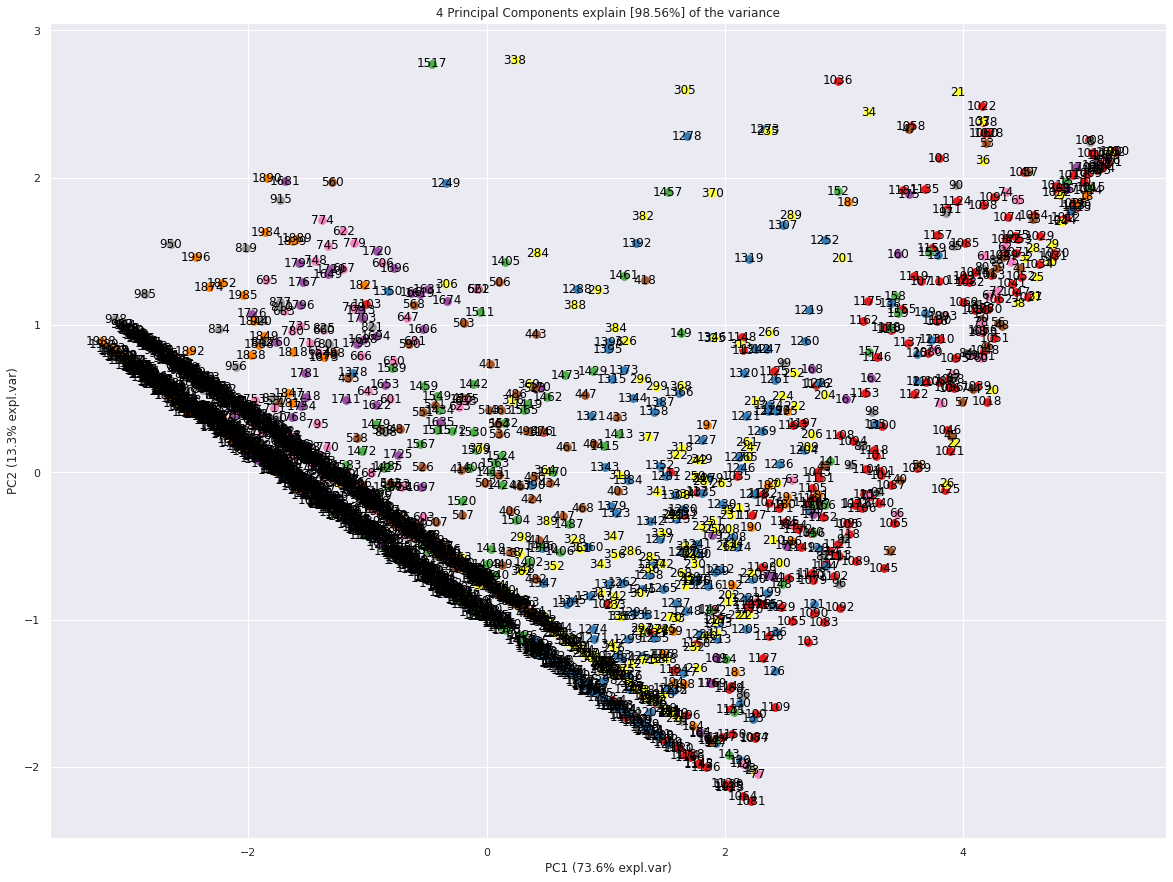

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4
WR -0.446317  0.228001  0.113552 -0.231786
QE -0.348911 -0.622899  0.687229  0.105103
QF -0.352982 -0.602519 -0.700651 -0.140327
PB -0.432312  0.297784  0.049651 -0.431001
IF -0.435438  0.238524 -0.006645 -0.123865
CT -0.421860  0.226747 -0.146294  0.845241

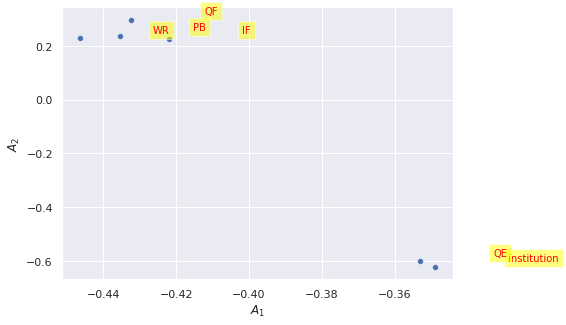

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

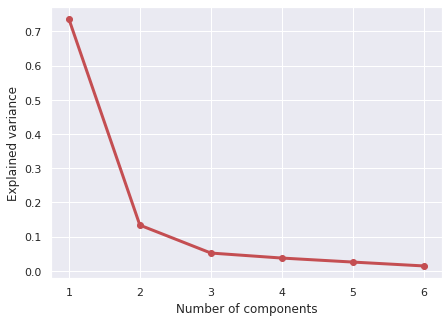

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

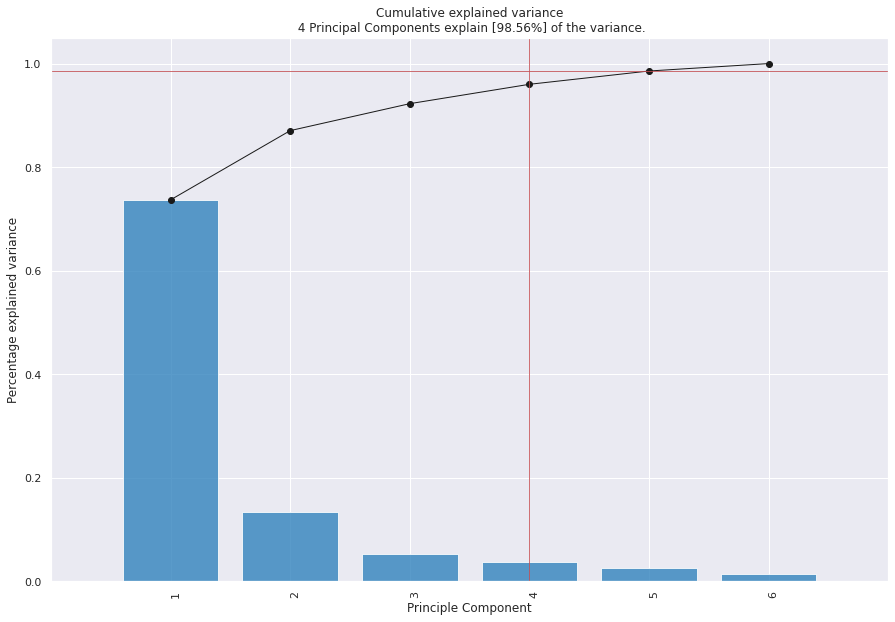

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2000] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2000] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


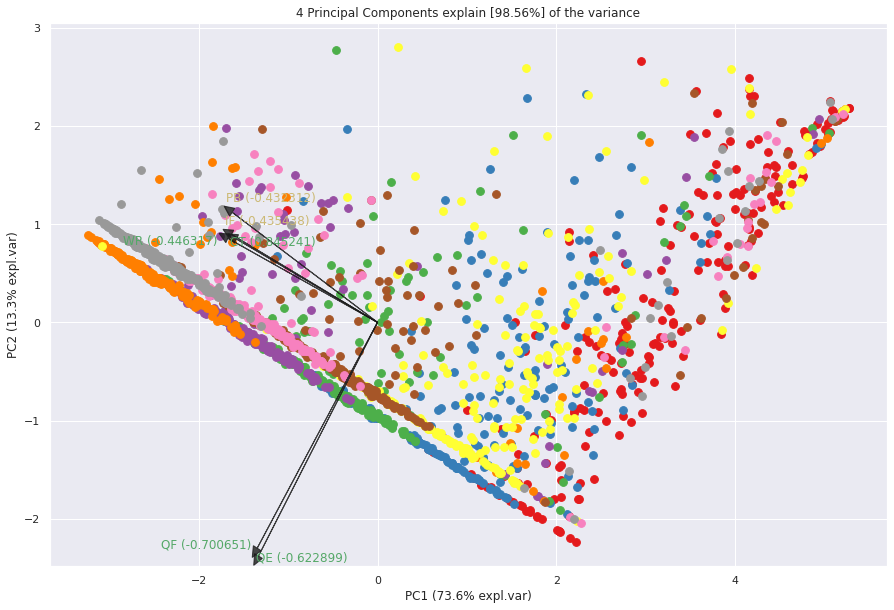

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4558977df0>)

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2000] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2000] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


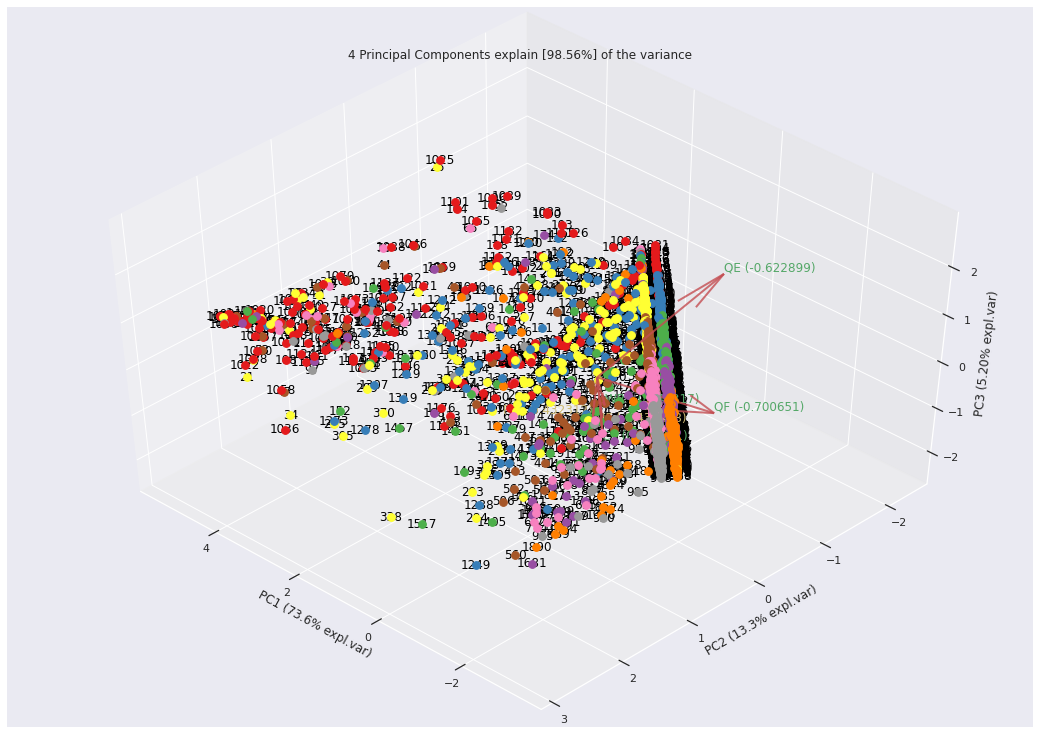

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f45574fe9d0>)

In [ ]:
model.biplot3d(legend=False)

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. 
Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

 However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1800, 8)
Unseen Data For Predictions: (200, 8)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (1800, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (1259, 876)
12                    Transformed Test Set        (541, 876)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              0f59
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [ ]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8904  0.9789  0.8854  0.8915   
dt               Decision Tree Classifier    0.8888  0.8885  0.8708  0.9012   
ada                  Ada Boost Classifier    0.8809  0.9627  0.8740  0.8829   
rf               Random Forest Classifier    0.8729  0.9654  0.8482  0.8884   
gbc          Gradient Boosting Classifier    0.8682  0.9755  0.8482  0.8799   
et                 Extra Trees Classifier    0.6195  0.7198  0.7304  0.5939   
dummy                    Dummy Classifier    0.5083  0.5000  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.4964  0.0000  0.8016  0.5003   
knn                K Neighbors Classifier    0.4440  0.4347  0.4070  0.4312   
qda       Quadratic Discriminant Analysis    0.3423  0.3423  0.3471  0.3218   
lr                    Logistic Regression    0.2367  0.1206  0.1955  0.2055   
ridge                    Ridge Classifier    0.2264  0.0000  0.2149  0.2129   
nb                            Naive Bayes    0.2073  0.1235  0.4216  0.2877   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.8882  0.7807  0.7812     0.183  
dt        0.8847  0.7775  0.7795     0.039  
ada       0.8781  0.7616  0.7622     0.310  
rf        0.8675  0.7456  0.7468     0.342  
gbc       0.8633  0.7361  0.7372     0.723  
et        0.6540  0.2420  0.2491     0.801  
dummy     0.0000  0.0000  0.0000     0.030  
svm       0.5485  0.0032 -0.0015     0.192  
knn       0.4174 -0.1134 -0.1141     0.151  
qda       0.3271 -0.3153 -0.3301     0.326  
lr        0.2000 -0.5284 -0.5311     0.397  
ridge     0.2134 -0.5475 -0.5500     0.054  
nb        0.3418 -0.5742 -0.6413     0.039

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (1800, 8)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 1
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (1259, 3)
12                    Transformed Test Set          (541, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              0192
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

# **Comparing Models**

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.8031  0.9082  0.7804  0.8122   
lightgbm  Light Gradient Boosting Machine    0.7927  0.9023  0.7659  0.8051   
et                 Extra Trees Classifier    0.7745  0.8629  0.7481  0.7844   
rf               Random Forest Classifier    0.7705  0.8463  0.7465  0.7791   
dt               Decision Tree Classifier    0.7332  0.7331  0.7240  0.7322   
gbc          Gradient Boosting Classifier    0.7308  0.7991  0.6964  0.7443   
ada                  Ada Boost Classifier    0.5822  0.5959  0.5751  0.5744   
qda       Quadratic Discriminant Analysis    0.5266  0.5590  0.3051  0.5250   
lr                    Logistic Regression    0.5251  0.5357  0.3893  0.5337   
ridge                    Ridge Classifier    0.5251  0.0000  0.3893  0.5337   
lda          Linear Discriminant Analysis    0.5251  0.5354  0.3893  0.5337   
nb                            Naive Bayes    0.5242  0.5399  0.3441  0.5282   
dummy                    Dummy Classifier    0.5083  0.5000  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.4948  0.0000  0.6152  0.4929   

              F1   Kappa     MCC  TT (Sec)  
knn       0.7956  0.6058  0.6067     0.036  
lightgbm  0.7840  0.5850  0.5870     0.054  
et        0.7654  0.5485  0.5496     0.184  
rf        0.7609  0.5405  0.5427     0.413  
dt        0.7272  0.4662  0.4673     0.020  
gbc       0.7171  0.4609  0.4644     0.196  
ada       0.5728  0.1642  0.1653     0.161  
qda       0.3807  0.0459  0.0482     0.019  
lr        0.4469  0.0459  0.0509     0.021  
ridge     0.4469  0.0459  0.0509     0.015  
lda       0.4469  0.0459  0.0509     0.016  
nb        0.4159  0.0428  0.0468     0.025  
dummy     0.0000  0.0000  0.0000     0.010  
svm       0.5269 -0.0065 -0.0128     0.022

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


# **Best model with PCA**

In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Tune Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7857  0.8950  0.6935  0.8431  0.7611  0.5701  0.5791
1       0.8175  0.9143  0.7419  0.8679  0.8000  0.6340  0.6406
2       0.8254  0.9059  0.6774  0.9545  0.7925  0.6491  0.6776
3       0.8254  0.9104  0.7258  0.9000  0.8036  0.6496  0.6618
4       0.8333  0.9166  0.7742  0.8727  0.8205  0.6660  0.6702
5       0.7698  0.8828  0.6613  0.8367  0.7387  0.5381  0.5500
6       0.7937  0.8894  0.6613  0.8913  0.7593  0.5855  0.6056
7       0.7937  0.8810  0.6935  0.8600  0.7679  0.5859  0.5969
8       0.8095  0.9055  0.7097  0.8800  0.7857  0.6178  0.6294
9       0.8400  0.9365  0.7377  0.9184  0.8182  0.6783  0.6913
Mean    0.8094  0.9037  0.7076  0.8825  0.7847  0.6175  0.6303
SD      0.0217  0.0162  0.0353  0.0337  0.0258  0.0435  0.0441

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


# **Evaluate Best Model**

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create and Evaluate lightgbm**

In [ ]:
lightgbm = create_model('lightgbm')


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7857  0.8977  0.8065  0.7692  0.7874  0.5716  0.5723
1       0.8016  0.9045  0.7581  0.8246  0.7899  0.6026  0.6045
2       0.7778  0.8756  0.7742  0.7742  0.7742  0.5554  0.5554
3       0.8333  0.9114  0.7903  0.8596  0.8235  0.6662  0.6683
4       0.8175  0.9385  0.7903  0.8305  0.8099  0.6346  0.6353
5       0.8095  0.9181  0.7258  0.8654  0.7895  0.6180  0.6260
6       0.7540  0.8684  0.7097  0.7719  0.7395  0.5072  0.5088
7       0.7698  0.8926  0.7097  0.8000  0.7521  0.5388  0.5421
8       0.7698  0.8911  0.7581  0.7705  0.7642  0.5395  0.5395
9       0.8080  0.9249  0.8361  0.7846  0.8095  0.6164  0.6176
Mean    0.7927  0.9023  0.7659  0.8051  0.7840  0.5850  0.5870
SD      0.0238  0.0206  0.0399  0.0355  0.0254  0.0477  0.0483

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluate_model(lightgbm)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Create and Evaluate et**

In [ ]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7460  0.8346  0.7419  0.7419  0.7419  0.4919  0.4919
1       0.7778  0.8905  0.7419  0.7931  0.7667  0.5550  0.5561
2       0.7381  0.8557  0.7419  0.7302  0.7360  0.4762  0.4763
3       0.7698  0.8410  0.7097  0.8000  0.7521  0.5388  0.5421
4       0.8175  0.9050  0.7742  0.8421  0.8067  0.6344  0.6364
5       0.7460  0.8546  0.7097  0.7586  0.7333  0.4914  0.4924
6       0.7698  0.8121  0.7742  0.7619  0.7680  0.5397  0.5398
7       0.7778  0.8469  0.7419  0.7931  0.7667  0.5550  0.5561
8       0.7778  0.8735  0.7258  0.8036  0.7627  0.5548  0.5573
9       0.8240  0.9150  0.8197  0.8197  0.8197  0.6478  0.6478
Mean    0.7745  0.8629  0.7481  0.7844  0.7654  0.5485  0.5496
SD      0.0271  0.0310  0.0318  0.0335  0.0270  0.0541  0.0543

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
evaluate_model(et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
For binary classification, AI shapley can only support tree based classification models. So I chose the second best model "Light Gradeint Boosting machine" for the AI Shapley analysis.

In [ ]:
lightgbm_pca = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7857  0.8977  0.8065  0.7692  0.7874  0.5716  0.5723
1       0.8016  0.9045  0.7581  0.8246  0.7899  0.6026  0.6045
2       0.7778  0.8756  0.7742  0.7742  0.7742  0.5554  0.5554
3       0.8333  0.9114  0.7903  0.8596  0.8235  0.6662  0.6683
4       0.8175  0.9385  0.7903  0.8305  0.8099  0.6346  0.6353
5       0.8095  0.9181  0.7258  0.8654  0.7895  0.6180  0.6260
6       0.7540  0.8684  0.7097  0.7719  0.7395  0.5072  0.5088
7       0.7698  0.8926  0.7097  0.8000  0.7521  0.5388  0.5421
8       0.7698  0.8911  0.7581  0.7705  0.7642  0.5395  0.5395
9       0.8080  0.9249  0.8361  0.7846  0.8095  0.6164  0.6176
Mean    0.7927  0.9023  0.7659  0.8051  0.7840  0.5850  0.5870
SD      0.0238  0.0206  0.0399  0.0355  0.0254  0.0477  0.0483

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7063  0.7394  0.7419  0.6866  0.7132  0.4133  0.4146
1       0.7619  0.8256  0.7258  0.7759  0.7500  0.5232  0.5243
2       0.6984  0.7408  0.6935  0.6935  0.6935  0.3967  0.3967
3       0.7302  0.7743  0.7097  0.7333  0.7213  0.4599  0.4601
4       0.7381  0.8024  0.7258  0.7377  0.7317  0.4759  0.4760
5       0.7222  0.7567  0.6774  0.7368  0.7059  0.4436  0.4450
6       0.7222  0.7480  0.7258  0.7143  0.7200  0.4444  0.4445
7       0.6984  0.7281  0.6935  0.6935  0.6935  0.3967  0.3967
8       0.6508  0.7245  0.5806  0.6667  0.6207  0.3000  0.3025
9       0.7520  0.8566  0.8197  0.7143  0.7634  0.5054  0.5107
Mean    0.7181  0.7696  0.7094  0.7153  0.7113  0.4359  0.4371
SD      0.0302  0.0423  0.0567  0.0302  0.0370  0.0607  0.0609

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lightgbm_pca

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
evaluate_model(tuned_lightgbm_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


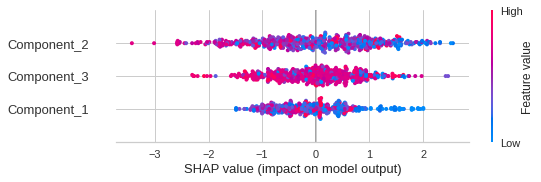

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_lightgbm_pca, plot='summary')


In [ ]:
shap.initjs()
interpret_model(tuned_lightgbm_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: LGBMClassifier


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
shap.initjs()
interpret_model(tuned_lightgbm_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
